In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
data = load_breast_cancer()
X,y = data['data'], data['target']
# como o modelo utilizado pelo instrutor vinha de uma longa série de vídeos, e acompanhar toda a série para obter o código seria desnecessário.
# foi optado por criar um modelo simples para testar as métricas apresentadas no vídeo

In [10]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)# treina o modelo utilizando o LogisticRegression, algoritmo para classificação binária

LogisticRegression(solver='liblinear')

In [13]:
model.score(X_test, y_test)

0.9385964912280702

In [14]:
predição_treino = model.predict(X_train)
predição_teste = model.predict(X_test)
print('precisão:',precision_score(y_test, predição_teste))
print('recall:',recall_score(y_test, predição_teste))
print('Acurácia treino:',accuracy_score(y_train, predição_treino))
print('Acurácia teste:',accuracy_score(y_test, predição_teste))

precisão: 0.9583333333333334
recall: 0.9452054794520548
Acurácia treino: 0.9692307692307692
Acurácia teste: 0.9385964912280702


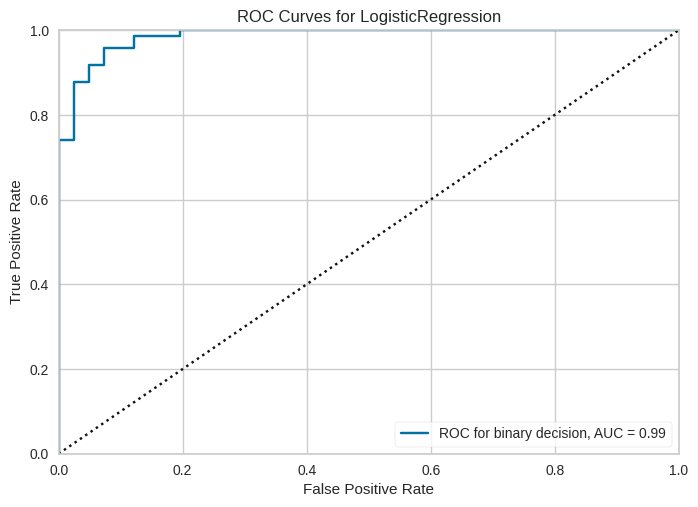

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [15]:
visualizer = ROCAUC(model, classes = ['malignant', 'benign'], binary = True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() #plotagem por yellowbrick

In [16]:
prob_treino = model.predict_proba(X_train)
acc_treino = accuracy_score(y_train, predição_treino)

prob_teste = model.predict_proba(X_test)

In [20]:

auc_treino = roc_auc_score(y_train, prob_treino[:,1])
auc_teste = roc_auc_score(y_test, prob_teste[:,1])
print('AUC treino:',auc_treino)
print('AUC teste:',auc_teste)

AUC treino: 0.9946874227823078
AUC teste: 0.9856331440026729


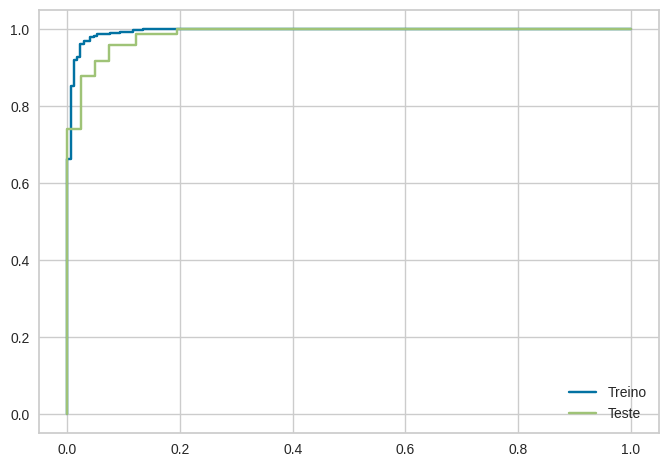

In [24]:
roc_treino = roc_curve(y_train, prob_treino[:,1])
roc_teste = roc_curve(y_test, prob_teste[:,1])
plt.plot(roc_treino[0], roc_treino[1], label='Treino')
plt.plot(roc_teste[0], roc_teste[1], label='Teste')
plt.legend()
plt.show() #plotagem da curva executada manualmente